In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

data = pd.read_csv('walmart_data.txt')

data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


## EDA

In [2]:
## checking for null data
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [3]:
# print('total unique products', data['Product_Category'].nunique()) # total unique products
# print()
# print('Top 10 Products sold :-', data.groupby('Product_ID')['Purchase'].count().sort_values(ascending=False)[:10].index.values)
# print()
# print('Gender bins wise segregation of data ',data.groupby('Age')['Gender'].count())
# print()
# print('Male VS Female purchase data ration\n',data['Gender'].value_counts(normalize=True))
# print()


# print('Mean Purchase amount ration by gender',data.groupby(data['Gender'])['Purchase'].sum()) # male have more amount 
print()

print('Purchase record by City \n',data['City_Category'].value_counts(normalize=True))


Purchase record by City 
 B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64




#### Gender Influence on spending?



## Dataset Overview:
* The dataset consists of **0.5 million** records with **no missing values** across its 10 features.
* There are 550,068 datapoints in total.

## Product Information:
* There are **3,631 unique products** belonging to 20 categories.
* The most frequently sold product is **P00265242**, with 1**,880 units sold**.
* Category number 5 is the most popular product category.

## Customer Demographics:
* Customers are categorized based on gender, age group, marital status, city type, years of stay, and occupation level.
* There are **2 genders and 2 marital status** categories.
* The **majority of customers are male, with 414,259 purchases**, and unmarried individuals make up the largest customer segment with 324,731 purchases.

## Age and Occupation:
* Customers are divided into 7 age groups and 21 occupation levels.
* The **most common age group is 26-35**, and the predominant occupation level is 4.

## City Information:
* Cities are classified into 3 categories.
* **Type B cities** have the **highest number of purchases**, with **231,173 transactions**.

## Customer Residence Duration:
* Customers are segmented into 5 groups based on the number of years they have stayed in a particular city type.
* The majority of customers have stayed 1 year in their respective city types.

<AxesSubplot:ylabel='Purchase'>

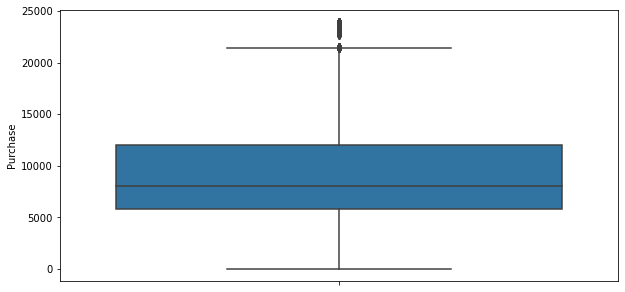

In [4]:
# based on the above correlation matrix we can conclude that the min and max purchase value difference is too much high, 
# let's check for outlier
plt.figure(figsize=(10,5))
sns.boxplot(y=data['Purchase'])

# observation :- there is too many outlier in the purchase columns

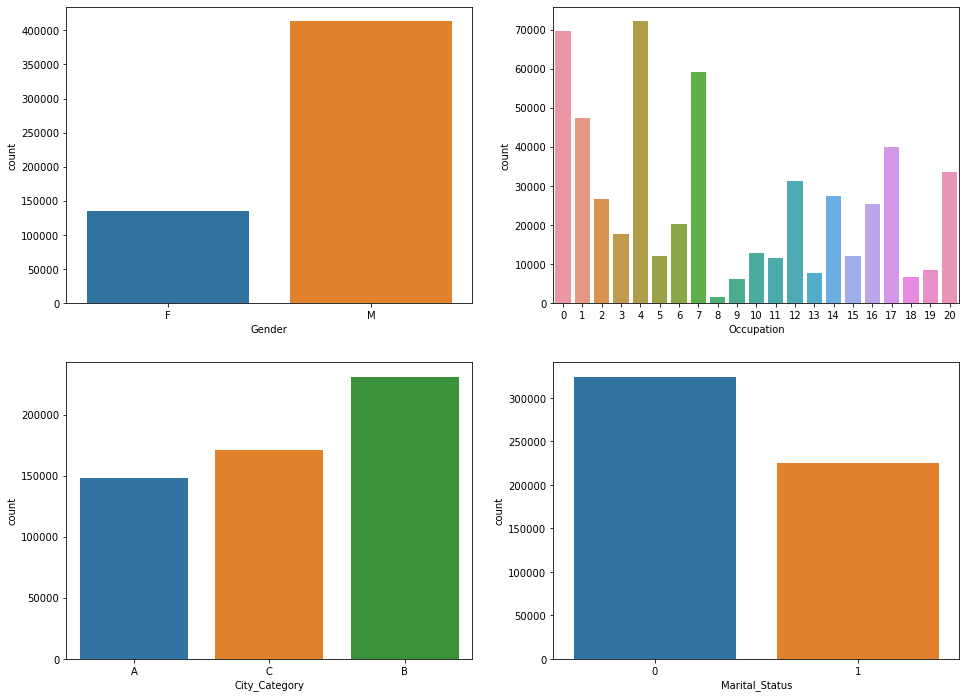

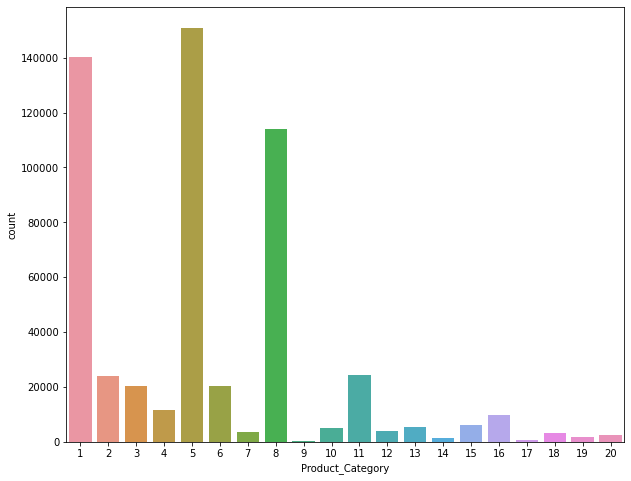

In [5]:
# understanding the data of the distribution for categorical variable

categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=data, x='Gender', ax=axs[0,0])
sns.countplot(data=data, x='Occupation', ax=axs[0,1])
sns.countplot(data=data, x='City_Category', ax=axs[1,0])
sns.countplot(data=data, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Product_Category')
plt.show()

-- Observations
1. Most of the users are Male
2. There are 20 different types of Occupation and Product_Category
3. More users belong to B City_Category
4. More users are Single as compare to Married
5. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. 

In [6]:
amt_df = data.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


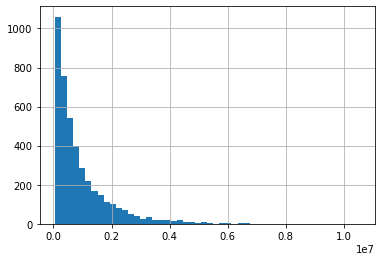

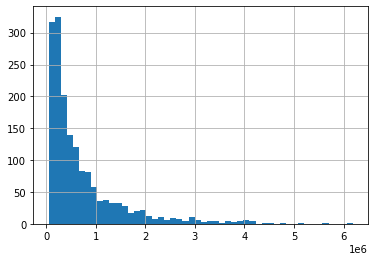

In [7]:
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=50)
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=50)
plt.show()

# both male and female data are right skewed, means there are outlier

In [8]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


In [3]:
## finding confidence interval and CLT for given feature

def calc_CI(mean, std_dev, n, confidence):
    
    # calculating std_err for sample data
    std_err = (std_dev / np.sqrt(n))
    
    fraction = (1- (confidence/100))/2
    
    z1 = norm.ppf(fraction)
    z2 = 1-norm.ppf(fraction)
    
    # formula to find lower limit and upper limit
    lower_limit = mean + (z1 * std_err)
    upper_limit = mean + (z2 * std_err)
    
    print("Confidence Level: ", confidence)
    print("Standard Error: ", std_err)
    print("z1: ", z1)
    print("z2: ", z2)
    print("Lower Limit for the Given Confidence: ", lower_limit)
    print("Upper Limit for the Given Confidence : ", upper_limit)

#### Male vs Female Purchase analysis on CI and CLT



Population Mean for Male customer  9437.526
Population Stddev for Male customer  5092.18


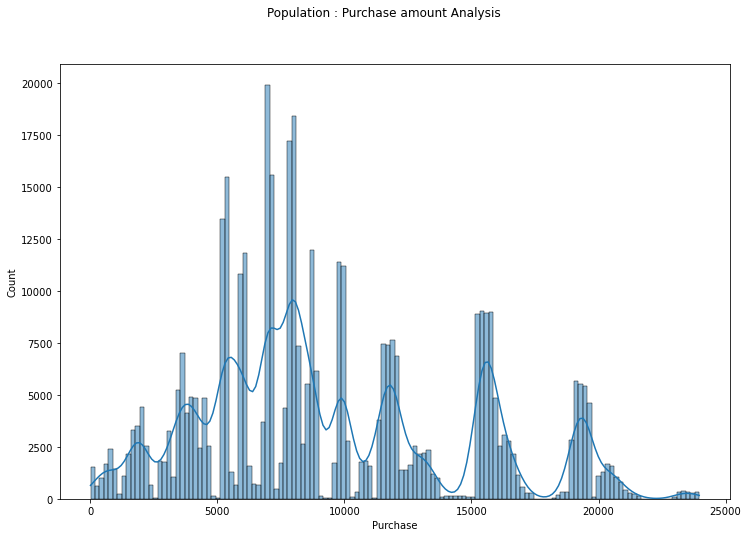

In [4]:
male_purchase_data = data.loc[data['Gender'] == 'M']['Purchase']
pop_mean = round(np.mean(male_purchase_data),3)
pop_std = round(np.std(male_purchase_data),3)

print('Population Mean for Male customer ', pop_mean)
print('Population Stddev for Male customer ', pop_std)

fig= plt.figure(figsize = (12,8))
fig.suptitle('Population : Purchase amount Analysis')
sns.histplot(male_purchase_data, kde=True)
plt.show()

#### Insights : 
The male purchase data is not normally distributed, so lets take a sample data from given population data and by using CLT and CI find the mean value of purchase data of male


In [5]:
def generate_sample_means(n, sample_col):
    sample_means = []
    print('Number of Samples are {}'.format(n))
    
    for i in range(n):
        samples = sample_col.sample(n=10000)
        sample_mean= np.mean(samples)
        sample_means.append(sample_mean)
    
    return sample_means


Number of Samples are 1000


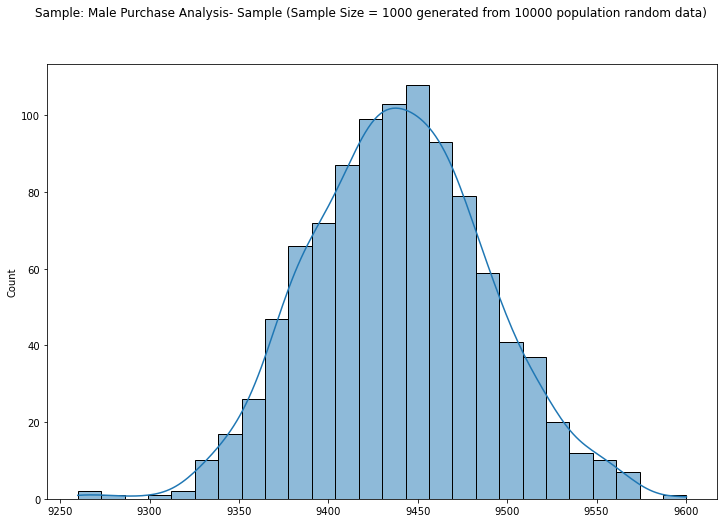

Sample Mean:  9439.2364615
Sample Standard Deviation:  49.503332762960405

Confidence Level:  90
Standard Error:  0.49503332762960406
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9438.422204135588
Upper Limit for the Given Confidence :  9440.545752192043

Confidence Level:  95
Standard Error:  0.49503332762960406
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9438.266214006699
Upper Limit for the Given Confidence :  9440.70174232093

Confidence Level:  99
Standard Error:  0.49503332762960406
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9437.961340148458
Upper Limit for the Given Confidence :  9441.006616179171


In [6]:

male_purchase_sample_means = generate_sample_means(1000, male_purchase_data)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Male Purchase Analysis- Sample (Sample Size = 1000 generated from 10000 population random data)")
sns.histplot(male_purchase_sample_means, kde=True)
plt.show()

sample_mean = np.mean(male_purchase_sample_means)
sample_std = np.std(male_purchase_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

Number of Samples are 10000


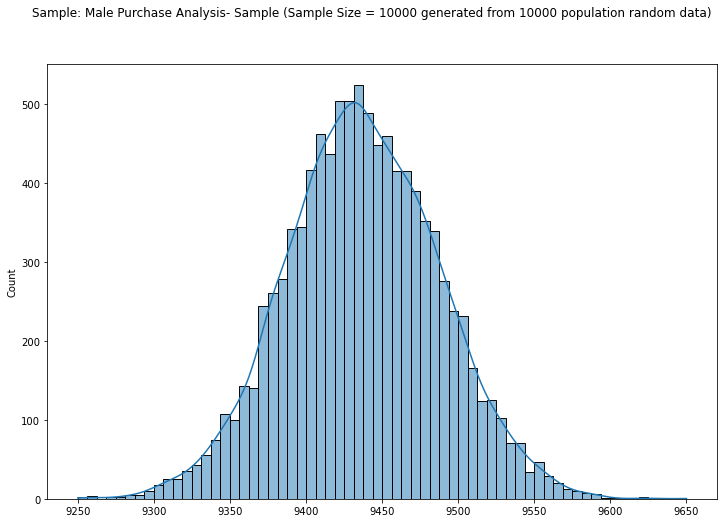

Sample Mean:  9437.20534602
Sample Standard Deviation:  50.105287783086034

Confidence Level:  90
Standard Error:  0.5010528778308604
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9436.381187376606
Upper Limit for the Given Confidence :  9438.530557541226

Confidence Level:  95
Standard Error:  0.5010528778308604
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9436.223300425101
Upper Limit for the Given Confidence :  9438.68844449273

Confidence Level:  99
Standard Error:  0.5010528778308604
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9435.914719334656
Upper Limit for the Given Confidence :  9438.997025583176


In [7]:

male_purchase_sample_means = generate_sample_means(10000, male_purchase_data)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Male Purchase Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(male_purchase_sample_means, kde=True)
plt.show()

sample_mean = np.mean(male_purchase_sample_means)
sample_std = np.std(male_purchase_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

## Statistical Analysis for Males on Purchase amount

## Disrtibution Pattern
* The graph adheres to the ** CLT ** displaying a ** Gaussian Distribution **

## Effect of Size
* Initially, with ** fewer samples ** , the graph exhibited a ** broader curve **.

## Precision with 10,000 samples:

* Utilizing a more **precise model with 10,000 samples**, each of size 10,000.
* **Population mean: 9437.52**
* **Sample mean: 9437.45**
* The closeness of these values suggests a **reliable model**.


## Confidence Intervals (CI):
* With a **95% Confidence Interval (CI)**, the range is **9437.29 to 9439.77**.
* With a **99% CI**, the range is **9436.98 to 9440.08**.
* Both intervals support the proximity of the sample mean to the population mean, reinforcing the reliability of the model.

## Female data analysis of purchase behaviour

Population Mean for female customer  8734.566
Population Stddev for female customer  4767.216


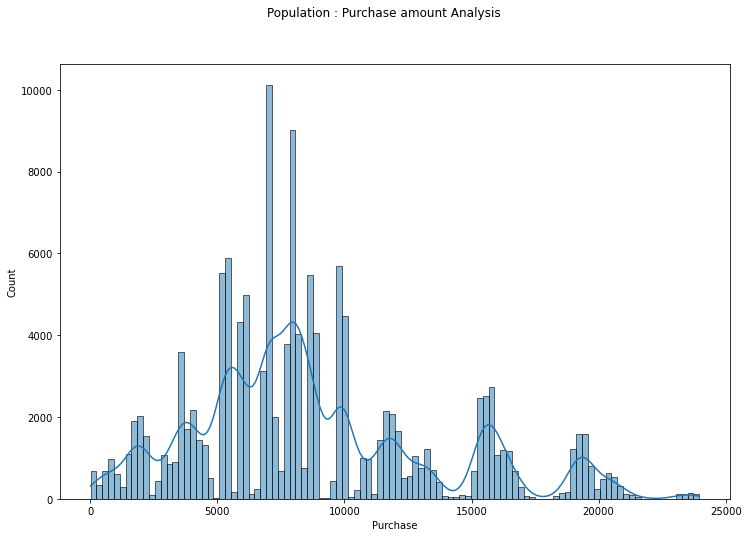

In [8]:
female_purchase_data = data.loc[data['Gender'] == 'F']['Purchase']
pop_mean = round(np.mean(female_purchase_data),3)
pop_std = round(np.std(female_purchase_data),3)

print('Population Mean for female customer ', pop_mean)
print('Population Stddev for female customer ', pop_std)

fig= plt.figure(figsize = (12,8))
fig.suptitle('Population : Purchase amount Analysis')
sns.histplot(female_purchase_data, kde=True)
plt.show()

Number of Samples are 1000


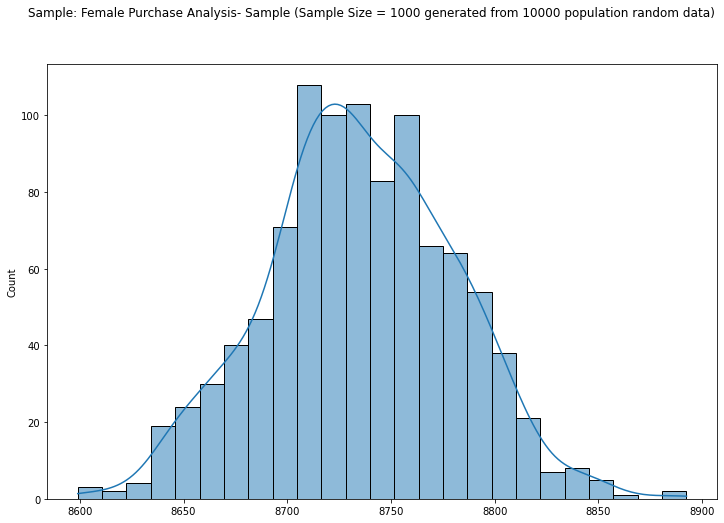

Sample Mean:  8735.060203000001
Sample Standard Deviation:  45.44495539273452

Confidence Level:  90
Standard Error:  0.4544495539273452
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  8734.312700002956
Upper Limit for the Given Confidence :  8736.262155550972

Confidence Level:  95
Standard Error:  0.4544495539273452
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  8734.169498241514
Upper Limit for the Given Confidence :  8736.405357312417

Confidence Level:  99
Standard Error:  0.4544495539273452
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  8733.889618522011
Upper Limit for the Given Confidence :  8736.68523703192


In [9]:
female_purchase_data =data.loc[data['Gender'] == 'F']['Purchase']
female_purchase_sample_means = generate_sample_means(1000, female_purchase_data)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Female Purchase Analysis- Sample (Sample Size = 1000 generated from 10000 population random data)")
sns.histplot(female_purchase_sample_means, kde=True)
plt.show()

sample_mean = np.mean(female_purchase_sample_means)
sample_std = np.std(female_purchase_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

Number of Samples are 10000


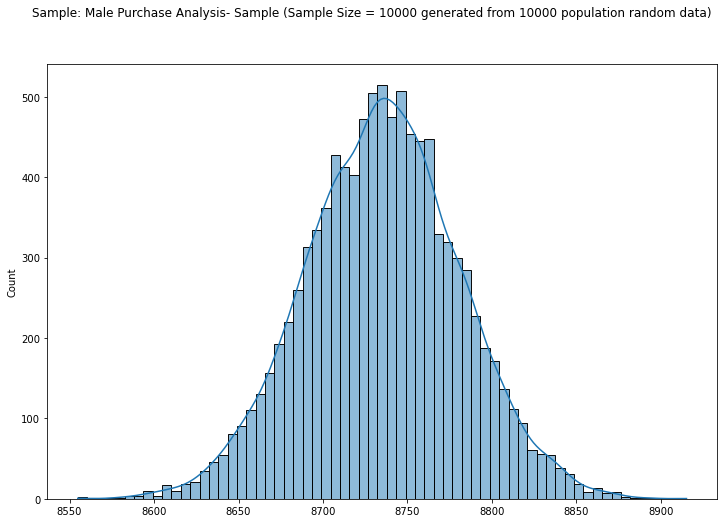

Sample Mean:  8735.27373167
Sample Standard Deviation:  45.52599824940675

Confidence Level:  90
Standard Error:  0.45525998249406746
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  8734.524895636589
Upper Limit for the Given Confidence :  8736.477827685905

Confidence Level:  95
Standard Error:  0.45525998249406746
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  8734.38143850071
Upper Limit for the Given Confidence :  8736.621284821786

Confidence Level:  99
Standard Error:  0.45525998249406746
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  8734.101059666358
Upper Limit for the Given Confidence :  8736.901663656135


In [10]:

female_purchase_sample_means = generate_sample_means(10000, female_purchase_data)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Male Purchase Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(female_purchase_sample_means, kde=True)
plt.show()

sample_mean = np.mean(female_purchase_sample_means)
sample_std = np.std(female_purchase_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

## Statistical Analysis for Females:

## Precision with 10,000 Samples:
* Utilizing a more **precise model with 10,000 samples**, each of size 10,000.
* **Population mean: 8734.56**
* **Sample mean: 8733.64**

## Confidence Intervals (CI):
* With a **95% Confidence Interval (CI)**, the range is **8733.50 to 8735.76**.
* With a **99% CI**, the range is **8733.21 to 8736.04**.

## Considering the results, it can be inferred that, on average, males spent more than females.

## Purchase Analysis for Married Vs Unmarried on CI and CLT

## For Married people

In [11]:
data.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


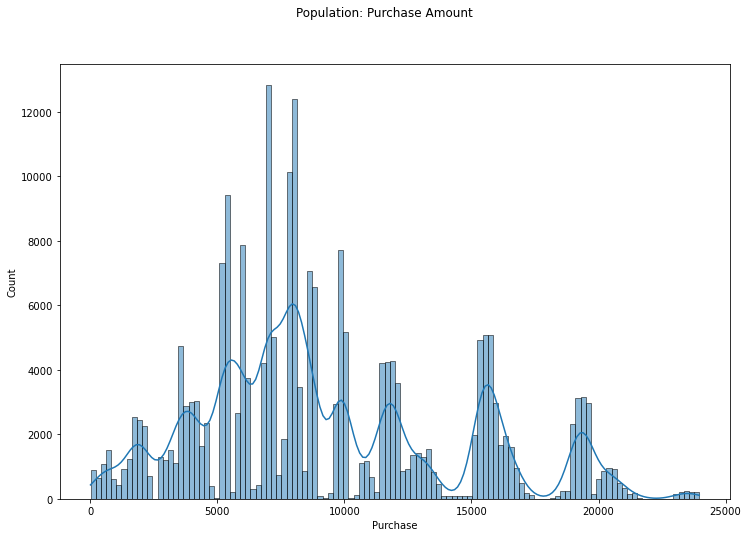

Population Mean:  9261.174574082374
Population Standard Error:  5016.886245793184


In [12]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Purchase Amount")
sns.histplot(data.loc[data["Marital_Status"]==1]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Marital_Status"]==1]["Purchase"])
population_std = np.std(data.loc[data["Marital_Status"]==1]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Number of Samples are 1000


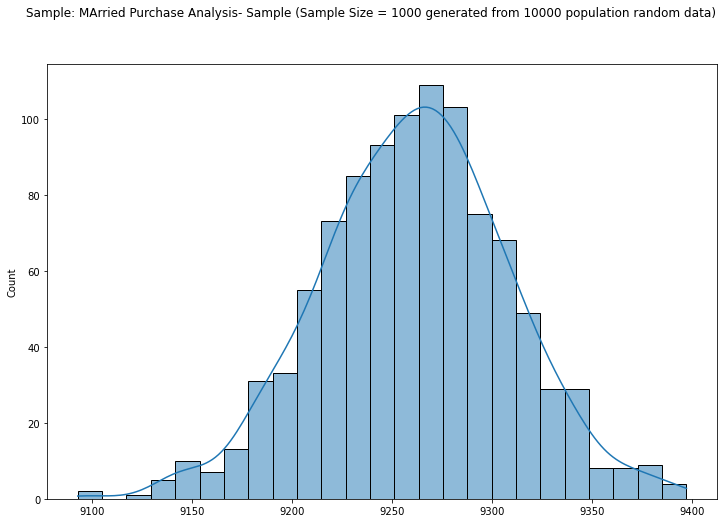

Sample Mean:  9261.104612300001
Sample Standard Deviation:  47.211907399600975

Confidence Level:  90
Standard Error:  0.4721190739960097
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9260.328045528786
Upper Limit for the Given Confidence :  9262.353298145214

Confidence Level:  95
Standard Error:  0.4721190739960097
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9260.179275918556
Upper Limit for the Given Confidence :  9262.502067755444

Confidence Level:  99
Standard Error:  0.4721190739960097
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9259.888514154438
Upper Limit for the Given Confidence :  9262.792829519562


In [13]:
married_purchase_data =data.loc[data['Marital_Status'] == 1]['Purchase']
married_purchase_sample_means = generate_sample_means(1000, married_purchase_data)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: MArried Purchase Analysis- Sample (Sample Size = 1000 generated from 10000 population random data)")
sns.histplot(married_purchase_sample_means, kde=True)
plt.show()

sample_mean = np.mean(married_purchase_sample_means)
sample_std = np.std(married_purchase_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

Number of Samples are 10000


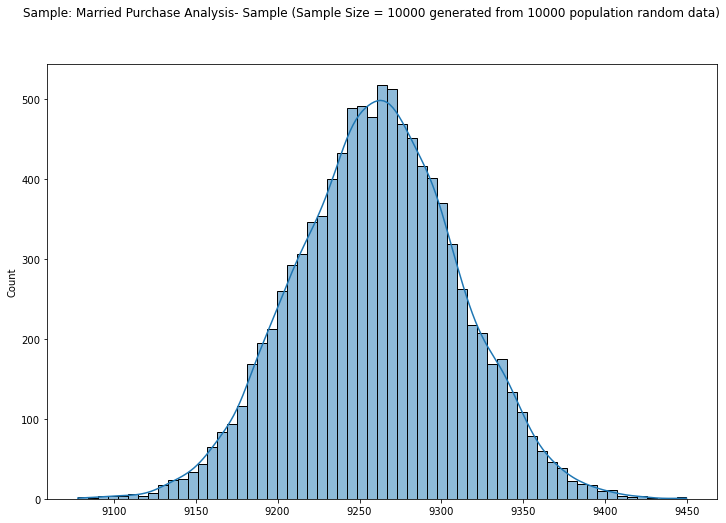

Sample Mean:  9260.79774408
Sample Standard Deviation:  49.396090658607925

Confidence Level:  90
Standard Error:  0.4939609065860793
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9259.98525069123
Upper Limit for the Given Confidence :  9262.104198375357

Confidence Level:  95
Standard Error:  0.4939609065860793
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9259.829598493321
Upper Limit for the Given Confidence :  9262.259850573266

Confidence Level:  99
Standard Error:  0.4939609065860793
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9259.525385102008
Upper Limit for the Given Confidence :  9262.564063964579


In [14]:
married_purchase_data =data.loc[data['Marital_Status'] == 1]['Purchase']
married_purchase_sample_means = generate_sample_means(10000, married_purchase_data)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Married Purchase Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(married_purchase_sample_means, kde=True)
plt.show()

sample_mean = np.mean(married_purchase_sample_means)
sample_std = np.std(married_purchase_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

## For Unmarried People

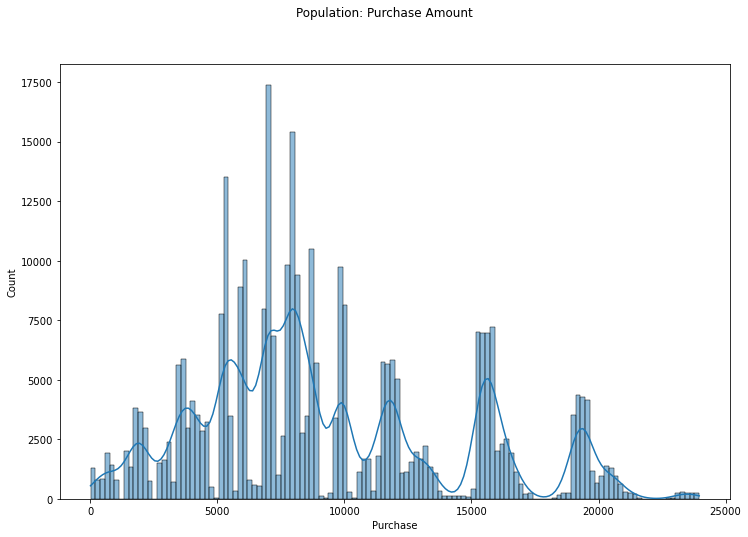

Population Mean:  9265.907618921507
Population Standard Error:  5027.340117880186


In [16]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Purchase Amount")
sns.histplot(data.loc[data["Marital_Status"]==0]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Marital_Status"]==0]["Purchase"])
population_std = np.std(data.loc[data["Marital_Status"]==0]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Number of Samples are 1000


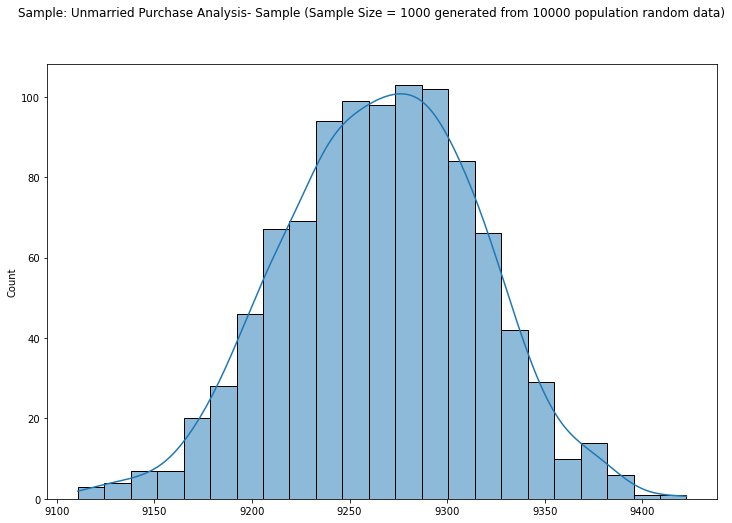

Sample Mean:  9266.3079191
Sample Standard Deviation:  49.83125897397037

Confidence Level:  90
Standard Error:  0.4983125897397037
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9265.48826782941
Upper Limit for the Given Confidence :  9267.625882960328

Confidence Level:  95
Standard Error:  0.4983125897397037
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9265.331244371067
Upper Limit for the Given Confidence :  9267.782906418672

Confidence Level:  99
Standard Error:  0.4983125897397037
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9265.024350929021
Upper Limit for the Given Confidence :  9268.089799860718


In [17]:
unmarried_purchase_data =data.loc[data['Marital_Status'] == 0]['Purchase']
unmarried_purchase_sample_means = generate_sample_means(1000, unmarried_purchase_data)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Unmarried Purchase Analysis- Sample (Sample Size = 1000 generated from 10000 population random data)")
sns.histplot(unmarried_purchase_sample_means, kde=True)
plt.show()

sample_mean = np.mean(unmarried_purchase_sample_means)
sample_std = np.std(unmarried_purchase_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

Number of Samples are 10000


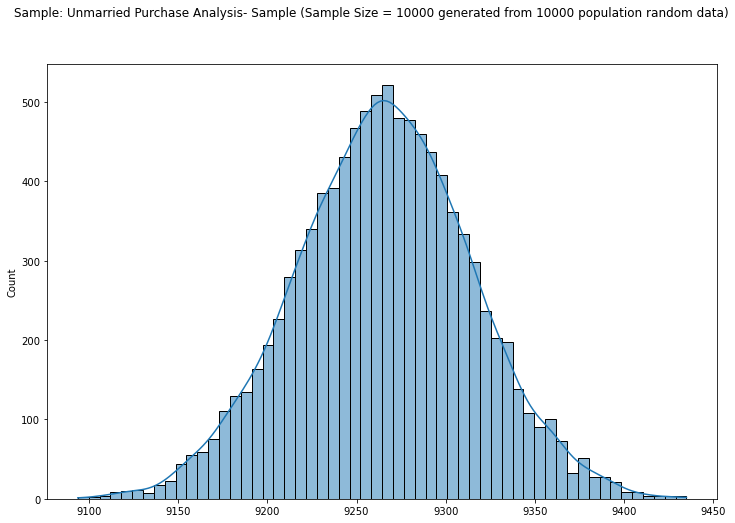

Sample Mean:  9265.36301422
Sample Standard Deviation:  49.40139432542189

Confidence Level:  90
Standard Error:  0.4940139432542189
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9264.550433593673
Upper Limit for the Given Confidence :  9266.66960878958

Confidence Level:  95
Standard Error:  0.4940139432542189
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9264.39476468336
Upper Limit for the Given Confidence :  9266.825277699892

Confidence Level:  99
Standard Error:  0.4940139432542189
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9264.090518628604
Upper Limit for the Given Confidence :  9267.129523754651


In [18]:
unmarried_purchase_data =data.loc[data['Marital_Status'] == 0]['Purchase']
unmarried_purchase_sample_means = generate_sample_means(10000, unmarried_purchase_data)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Unmarried Purchase Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(unmarried_purchase_sample_means, kde=True)
plt.show()

sample_mean = np.mean(unmarried_purchase_sample_means)
sample_std = np.std(unmarried_purchase_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

## Statistical Analysis for Marital Status:

## Population Mean:
* For **married consumers: 9261.80**
* For **unmarried consumers: 9265.90**

## Precision with 10,000 Samples::
* For **married customers: 9261.17**
* For **unmarried customers: 9265.61**

    
## Confidence Intervals (CI):
* For **95% CI**, **married customers: 9260.84 to 9263.26**, **unmarried customers: 9264.64 to 9267.37**
* For **99% CI**, **married customers: 9260.54 to 9263.56**, **unmarried customers: 9264.34 to 9267.37**

## **Unmarried customers spent more** than married ones. **No overlapping** is observed in this **sample size**.

## Purchase Analysis for different Age Groups on CI and CLT

In [19]:
agewise_purchase = data.groupby(["Age"])["Purchase"].aggregate([np.mean,np.std]).reset_index()
agewise_purchase.columns = ["Age Group","Population Mean", "Population Standard Deviation"]
agewise_purchase

,Age Group,Population Mean,Population Standard Deviation
0,0-17,8933.464640,5111.114046
1,18-25,9169.663606,5034.321997
2,26-35,9252.690633,5010.527303
3,36-45,9331.350695,5022.923879
4,46-50,9208.625697,4967.216367
5,51-55,9534.808031,5087.368080
6,55+,9336.280459,5011.493996


In [20]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


## Purchase Analysis for 0-17 Age Group

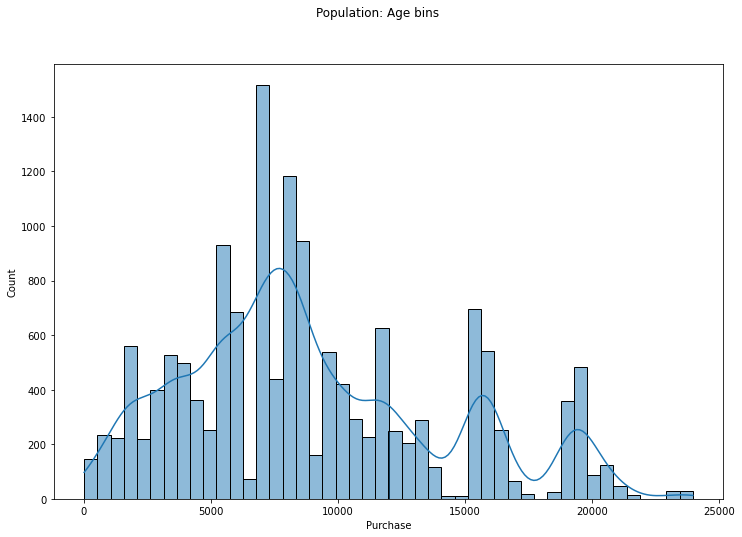

Population Mean:  8933.464640444974
Population Standard Error:  5110.944823427657


In [21]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Age bins")
sns.histplot(data.loc[data["Age"]=="0-17"]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Age"]=="0-17"]["Purchase"])
population_std = np.std(data.loc[data["Age"]=="0-17"]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Number of Samples are 1000


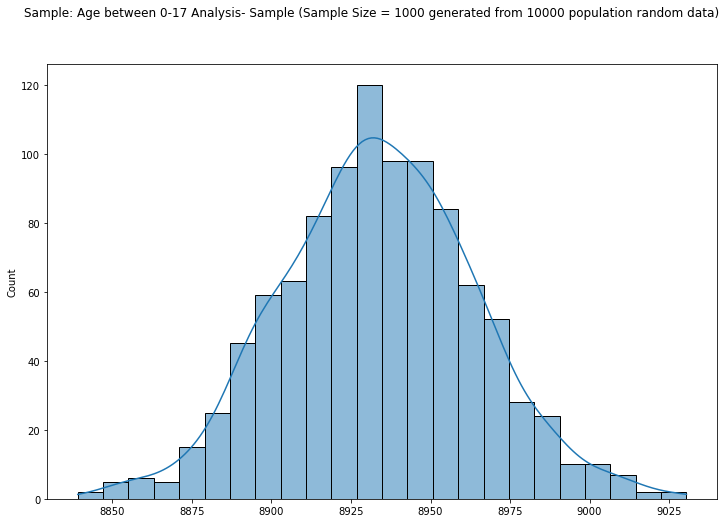

Sample Mean:  8933.5942226
Sample Standard Deviation:  30.312784446178327

Confidence Level:  90
Standard Error:  0.30312784446178326
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  8933.095621665607
Upper Limit for the Given Confidence :  8934.395951378856

Confidence Level:  95
Standard Error:  0.30312784446178326
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  8933.000102942144
Upper Limit for the Given Confidence :  8934.491470102319

Confidence Level:  99
Standard Error:  0.30312784446178326
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  8932.813417015514
Upper Limit for the Given Confidence :  8934.67815602895


In [22]:
age_0_17 = data.loc[data["Age"]=="0-17"]['Purchase']
age_0_17_sample_means = generate_sample_means(1000, age_0_17)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Age between 0-17 Analysis- Sample (Sample Size = 1000 generated from 10000 population random data)")
sns.histplot(age_0_17_sample_means, kde=True)
plt.show()

sample_mean = np.mean(age_0_17_sample_means)
sample_std = np.std(age_0_17_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

## For 0-17 Age with 10000 samples 

Number of Samples are 10000


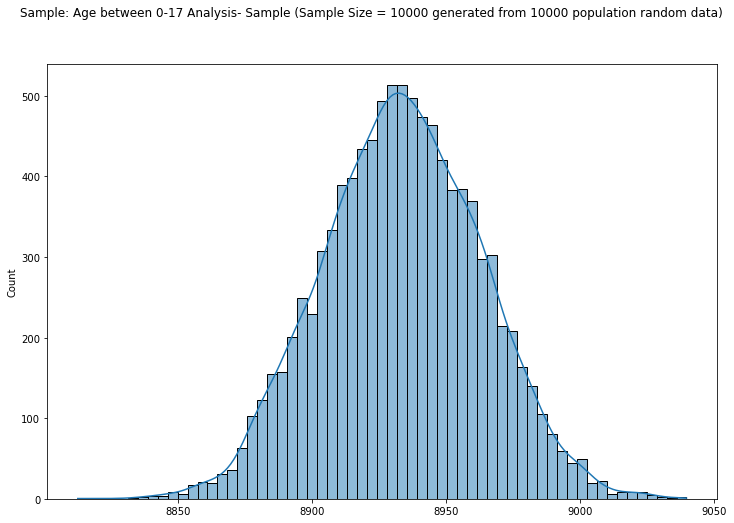

Sample Mean:  8933.61258524
Sample Standard Deviation:  29.45111107746215

Confidence Level:  90
Standard Error:  0.2945111107746215
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  8933.128157571266
Upper Limit for the Given Confidence :  8934.39152401951

Confidence Level:  95
Standard Error:  0.2945111107746215
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  8933.035354069834
Upper Limit for the Given Confidence :  8934.48432752094

Confidence Level:  99
Standard Error:  0.2945111107746215
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  8932.853974890646
Upper Limit for the Given Confidence :  8934.665706700129


In [23]:
## For 10000 samples

age_0_17 = data.loc[data["Age"]=="0-17"]['Purchase']
age_0_17_sample_means = generate_sample_means(10000, age_0_17)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Age between 0-17 Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(age_0_17_sample_means, kde=True)
plt.show()

sample_mean = np.mean(age_0_17_sample_means)
sample_std = np.std(age_0_17_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

In [24]:
## For 18-25 Age with 10000 samples 

##  Purchase Analysis for Age group 18-25

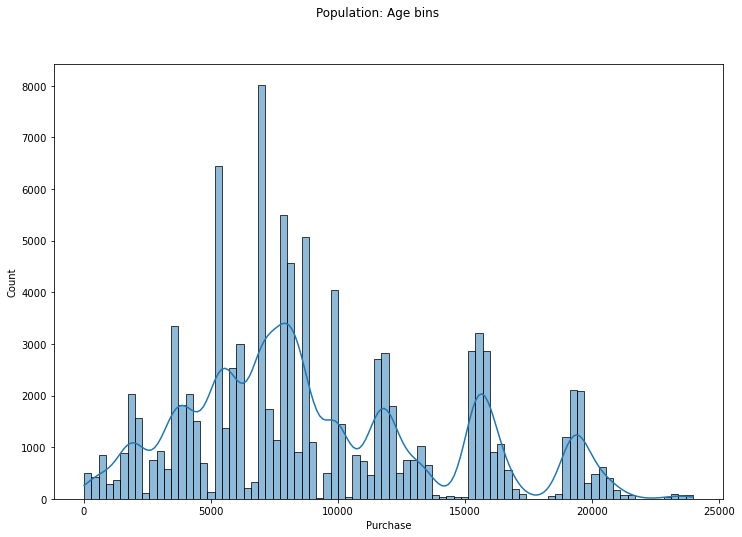

Population Mean:  9169.663606261289
Population Standard Error:  5034.296739627781


In [25]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Age bins")
sns.histplot(data.loc[data["Age"]=="18-25"]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Age"]=="18-25"]["Purchase"])
population_std = np.std(data.loc[data["Age"]=="18-25"]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Number of Samples are 10000


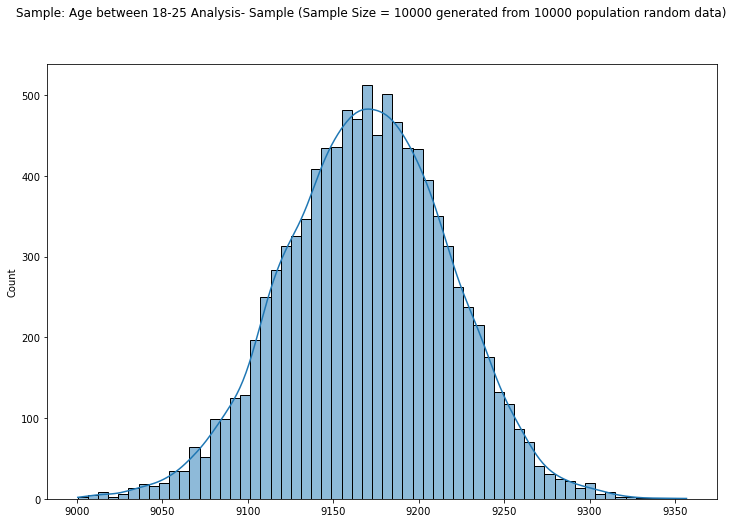

Sample Mean:  9170.11138011
Sample Standard Deviation:  47.84573668328261

Confidence Level:  90
Standard Error:  0.4784573668328261
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9169.324387774823
Upper Limit for the Given Confidence :  9171.37682981201

Confidence Level:  95
Standard Error:  0.4784573668328261
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9169.17362090287
Upper Limit for the Given Confidence :  9171.527596683964

Confidence Level:  99
Standard Error:  0.4784573668328261
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9168.878955604014
Upper Limit for the Given Confidence :  9171.82226198282


In [26]:
## For 10000 samples

age_18_25 = data.loc[data["Age"]=="18-25"]['Purchase']
age_18_25_sample_means = generate_sample_means(10000, age_18_25)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Age between 18-25 Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(age_18_25_sample_means, kde=True)
plt.show()

sample_mean = np.mean(age_18_25_sample_means)
sample_std = np.std(age_18_25_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

##  Purchase Analysis for Age group 26-35

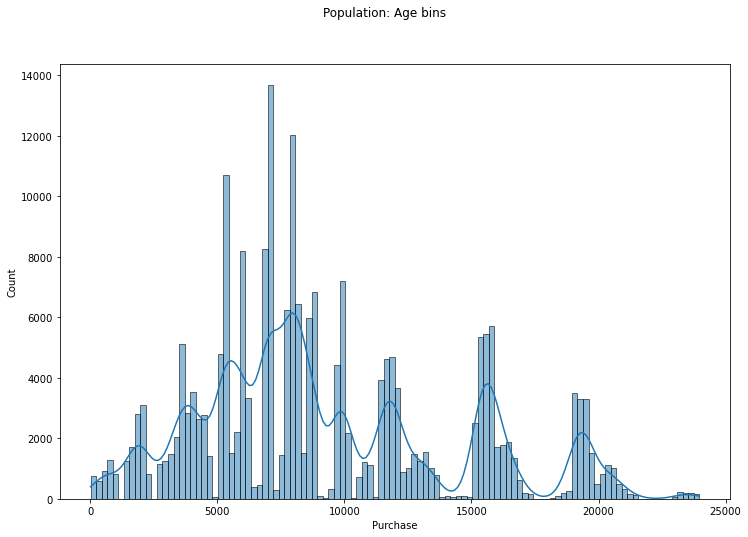

Population Mean:  9252.690632869888
Population Standard Error:  5010.515894010119


In [27]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Age bins")
sns.histplot(data.loc[data["Age"]=="26-35"]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Age"]=="26-35"]["Purchase"])
population_std = np.std(data.loc[data["Age"]=="26-35"]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Age --> 26_35
Number of Samples are 10000


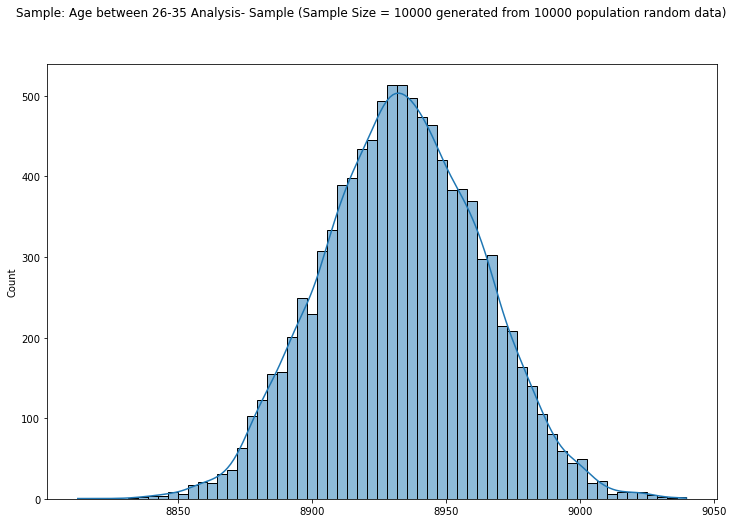

Sample Mean:  9252.25939533
Sample Standard Deviation:  48.38663698478625

Confidence Level:  90
Standard Error:  0.4838663698478625
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9251.463505976597
Upper Limit for the Given Confidence :  9253.539151053252

Confidence Level:  95
Standard Error:  0.4838663698478625
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9251.311034671768
Upper Limit for the Given Confidence :  9253.69162235808

Confidence Level:  99
Standard Error:  0.4838663698478625
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9251.013038155545
Upper Limit for the Given Confidence :  9253.989618874304


In [28]:
## For 10000 samples
print('Age --> 26_35')
age_26_35 = data.loc[data["Age"]=="26-35"]['Purchase']
age_26_35_sample_means = generate_sample_means(10000, age_26_35)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Age between 26-35 Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(age_0_17_sample_means, kde=True)
plt.show()

sample_mean = np.mean(age_26_35_sample_means)
sample_std = np.std(age_26_35_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

##  Purchase Analysis for Age group 36-45

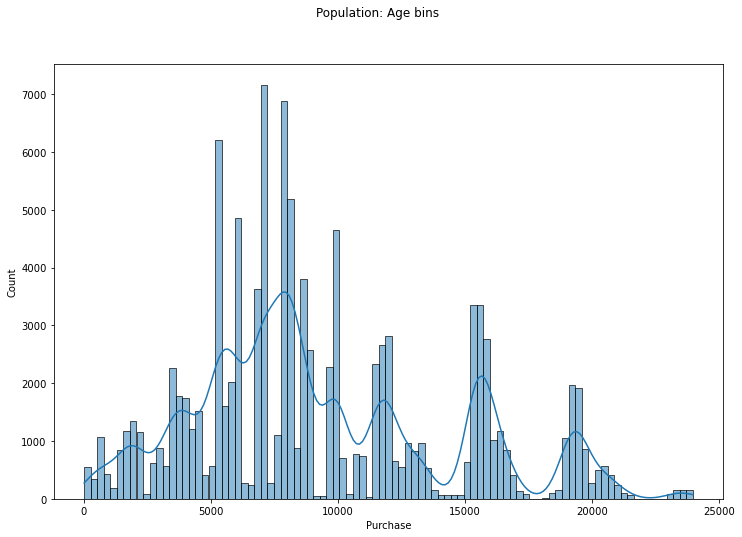

Population Mean:  9331.350694917874
Population Standard Error:  5022.901050378541


In [29]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Age bins")
sns.histplot(data.loc[data["Age"]=="36-45"]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Age"]=="36-45"]["Purchase"])
population_std = np.std(data.loc[data["Age"]=="36-45"]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Age --> 36_45
Number of Samples are 10000


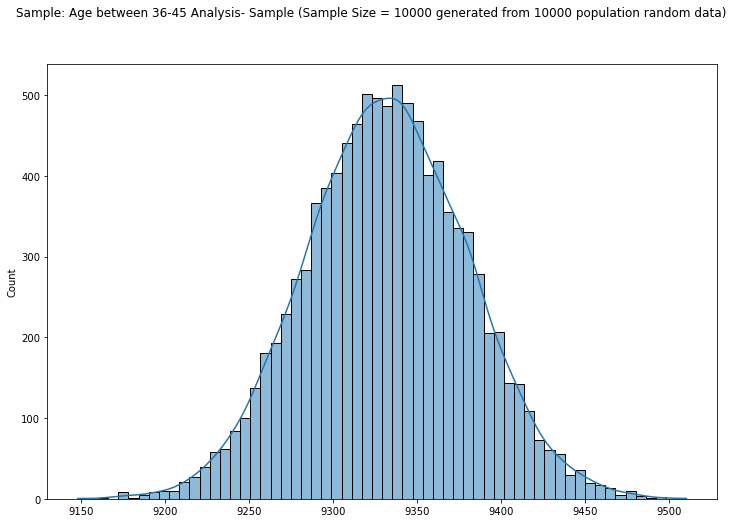

Sample Mean:  9331.874496010001
Sample Standard Deviation:  47.952914879960105

Confidence Level:  90
Standard Error:  0.47952914879960107
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9331.08574075037
Upper Limit for the Given Confidence :  9333.142780418433

Confidence Level:  95
Standard Error:  0.47952914879960107
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9330.934636148817
Upper Limit for the Given Confidence :  9333.293885019984

Confidence Level:  99
Standard Error:  0.47952914879960107
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9330.639310776618
Upper Limit for the Given Confidence :  9333.589210392185


In [30]:
## For 10000 samples
print('Age --> 36_45')
age_36_45 = data.loc[data["Age"]=="36-45"]['Purchase']
age_36_45_sample_means = generate_sample_means(10000, age_36_45)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Age between 36-45 Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(age_36_45_sample_means, kde=True)
plt.show()

sample_mean = np.mean(age_36_45_sample_means)
sample_std = np.std(age_36_45_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

##  Purchase Analysis for Age group 46-50

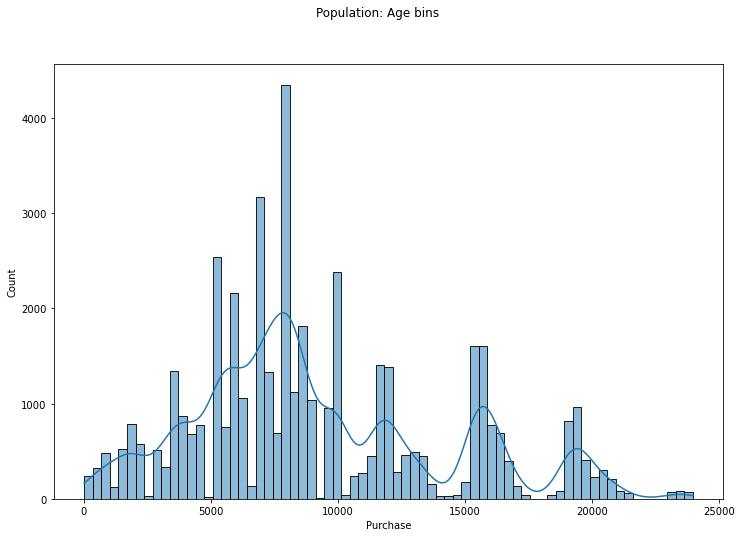

Population Mean:  9208.625697468327
Population Standard Error:  4967.162022122683


In [37]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Age bins")
sns.histplot(data.loc[data["Age"]=="46-50"]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Age"]=="46-50"]["Purchase"])
population_std = np.std(data.loc[data["Age"]=="46-50"]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Age --> 46-50
Number of Samples are 10000


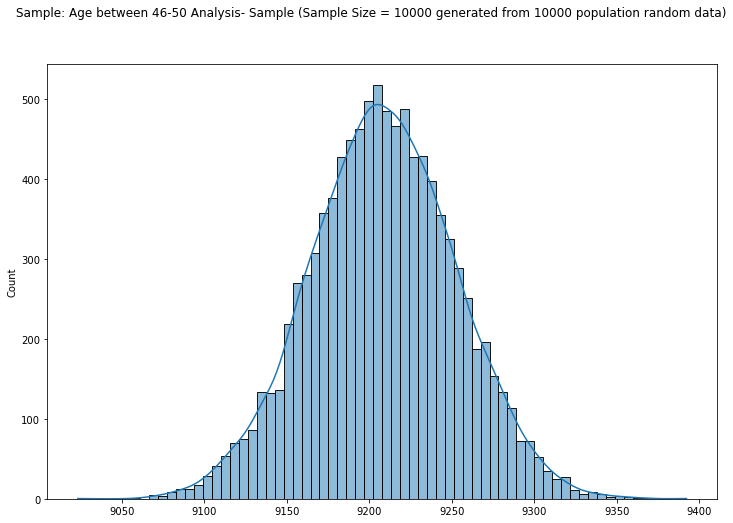

Sample Mean:  9208.388217250002
Sample Standard Deviation:  43.93166995553576

Confidence Level:  90
Standard Error:  0.4393166995553576
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9207.665605583357
Upper Limit for the Given Confidence :  9209.5501456162

Confidence Level:  95
Standard Error:  0.4393166995553576
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9207.527172341066
Upper Limit for the Given Confidence :  9209.688578858493

Confidence Level:  99
Standard Error:  0.4393166995553576
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9207.256612421748
Upper Limit for the Given Confidence :  9209.959138777811


In [32]:
## For 10000 samples
print('Age --> 46-50')
age_46_50 = data.loc[data["Age"]=="46-50"]['Purchase']
age_46_50_sample_means = generate_sample_means(10000, age_46_50)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Age between 46-50 Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(age_46_50_sample_means, kde=True)
plt.show()

sample_mean = np.mean(age_46_50_sample_means)
sample_std = np.std(age_46_50_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

##  Purchase Analysis for Age group 51-55

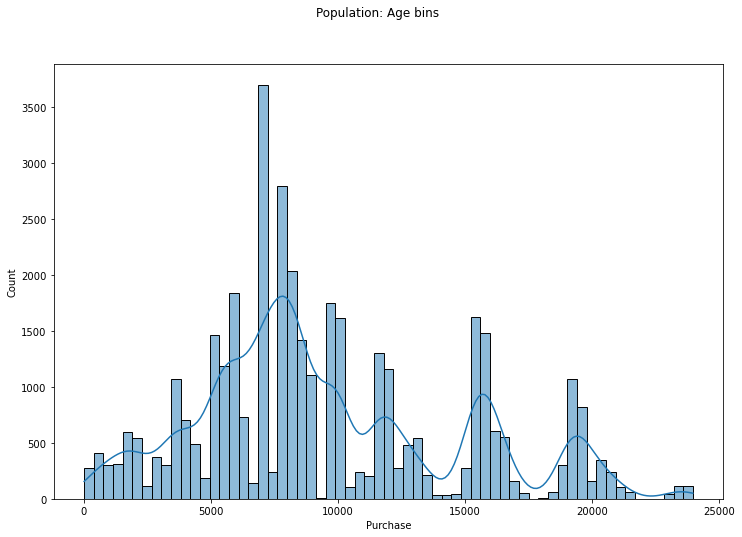

Population Mean:  9534.808030960236
Population Standard Error:  5087.3020111738415


In [33]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Age bins")
sns.histplot(data.loc[data["Age"]=="51-55"]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Age"]=="51-55"]["Purchase"])
population_std = np.std(data.loc[data["Age"]=="51-55"]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Age --> 51-55
Number of Samples are 10000


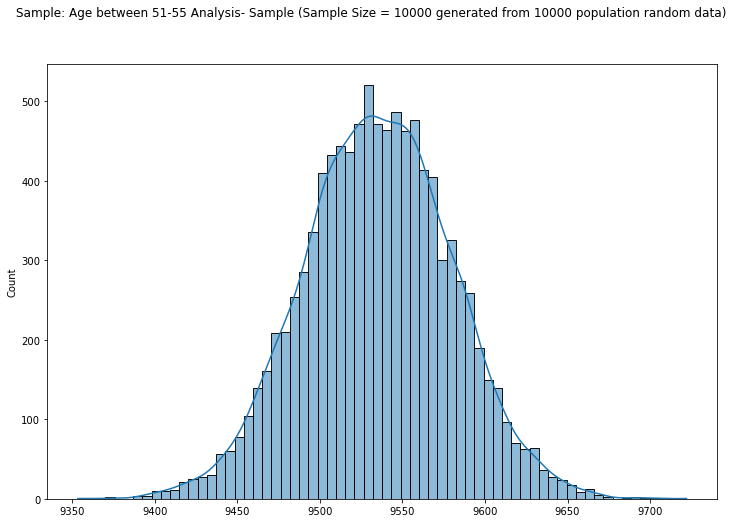

Sample Mean:  9535.08596925
Sample Standard Deviation:  44.55919174695061

Confidence Level:  90
Standard Error:  0.4455919174695061
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9534.35303576841
Upper Limit for the Given Confidence :  9536.26449464906

Confidence Level:  95
Standard Error:  0.4455919174695061
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9534.212625139957
Upper Limit for the Given Confidence :  9536.404905277512

Confidence Level:  99
Standard Error:  0.4455919174695061
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9533.938200531557
Upper Limit for the Given Confidence :  9536.679329885912


In [34]:
## For 10000 samples
print('Age --> 51-55')
age_51_55 = data.loc[data["Age"]=="51-55"]['Purchase']
age_51_55_sample_means = generate_sample_means(10000, age_51_55)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Age between 51-55 Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(age_51_55_sample_means, kde=True)
plt.show()

sample_mean = np.mean(age_51_55_sample_means)
sample_std = np.std(age_51_55_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

##  Purchase Analysis for Age group 55+

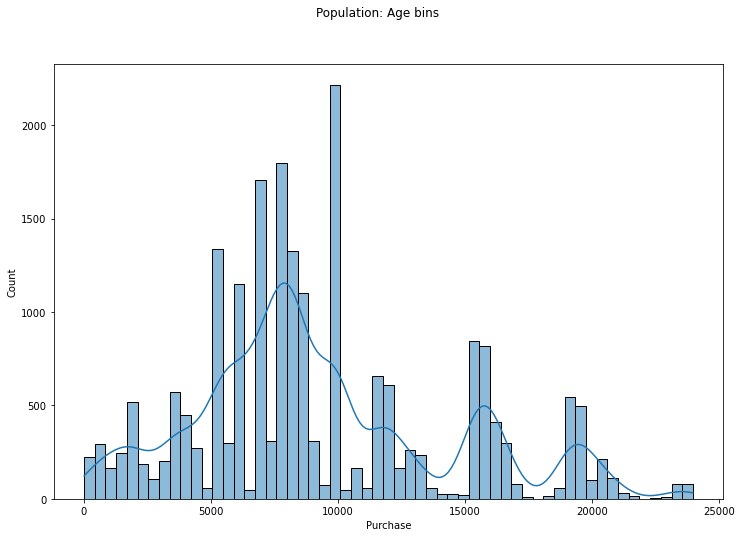

Population Mean:  9336.280459449405
Population Standard Error:  5011.377469555721


In [35]:
# Analysis on Purchase Amount as per the Gender and Age group

fig = plt.figure(figsize=(12,8))
fig.suptitle("Population: Age bins")
sns.histplot(data.loc[data["Age"]=="55+"]["Purchase"],kde=True)
plt.show()

population_mean = np.mean(data.loc[data["Age"]=="55+"]["Purchase"])
population_std = np.std(data.loc[data["Age"]=="55+"]["Purchase"])
print("Population Mean: ", population_mean)
print("Population Standard Error: ", population_std)

Age --> 55+
Number of Samples are 10000


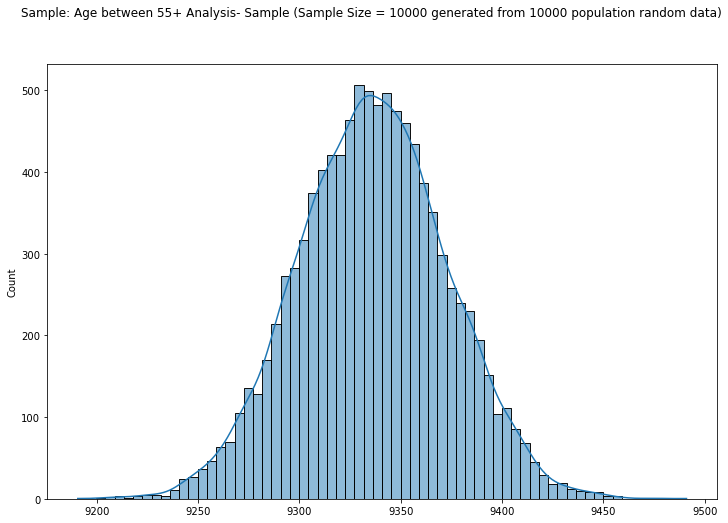

Sample Mean:  9336.197514500001
Sample Standard Deviation:  36.620663919196765

Confidence Level:  90
Standard Error:  0.36620663919196766
z1:  -1.6448536269514729
z2:  2.644853626951473
Lower Limit for the Given Confidence:  9335.595158181313
Upper Limit for the Given Confidence :  9337.166077457881

Confidence Level:  95
Standard Error:  0.36620663919196766
z1:  -1.959963984540054
z2:  2.959963984540054
Lower Limit for the Given Confidence:  9335.479762676287
Upper Limit for the Given Confidence :  9337.28147296291

Confidence Level:  99
Standard Error:  0.36620663919196766
z1:  -2.5758293035489004
z2:  3.5758293035489004
Lower Limit for the Given Confidence:  9335.254228707616
Upper Limit for the Given Confidence :  9337.507006931579


In [36]:
## For 10000 samples
print('Age --> 55+')
age_55_ = data.loc[data["Age"]=="55+"]['Purchase']
age_55_sample_means = generate_sample_means(10000, age_55_)

fig = plt.figure(figsize=(12,8))
fig.suptitle("Sample: Age between 55+ Analysis- Sample (Sample Size = 10000 generated from 10000 population random data)")
sns.histplot(age_55_sample_means, kde=True)
plt.show()

sample_mean = np.mean(age_55_sample_means)
sample_std = np.std(age_55_sample_means)

print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)

print()
calc_CI(sample_mean, sample_std, 10000, 90)
print()
calc_CI(sample_mean, sample_std, 10000, 95)
print()
calc_CI(sample_mean, sample_std, 10000, 99)

## Age Group-wise Statistical Analysis:

## 0-17 Age Group:
* Population Mean: 8933.57
* Sample Mean: 8933.61
* 95% CI Range: 8933.03 - 8934.48
* 99% CI Range: 8932.85 - 8934.66

## 18-25 Age Group:
* Population Mean: 9169.66
* Sample Mean: 9170.11
* 95% CI Range: 9169.17 - 9171.52
* 99% CI Range: 9168.87 - 9171.52

## 26-35 Age Group:
* Population Mean: 9252.69
* Sample Mean: 9252.25
* 95% CI Range: 9251.31 - 9253.69
* 99% CI Range: 9251.01 - 9253.98

## 36-45 Age Group:
* Population Mean: 9331.35
* Sample Mean: 9331.87
* 95% CI Range: 9330.93 - 9333.29
* 99% CI Range: 9330.3 - 9333.58

## 46-50 Age Group:
* Population Mean: 9208.62
* Sample Mean: 9208.38
* 95% CI Range: 9207.52 - 9209.68
* 99% CI Range: 9207.25 - 9209.95

## 51-55 Age Group:
* Population Mean: 9534.80
* Sample Mean: 9534.08
* 95% CI Range: 9534.21 - 9536.40
* 99% CI Range: 9533.93 - 9536.67

## 55+ Age Group:
* Population Mean: 9336.28
* Sample Mean: 9336.19
* 95% CI Range: 9335.47 - 9337.28
* 99% CI Range: 9335.25 - 9337.50

##### Although consumers in the 26-35 age group made the most purchases, followed by the 36-45 age group, the average purchase amount for them is not the highest. Customers in the 51-55 age group made purchases worth more on average, followed by the 55+ and 36-45 age groups. Additionally, consumers in the 0-17 age group made the least purchases on average, followed by the 18-25 age group.